In [87]:
import numpy as np
import pandas as pd

In [88]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [89]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
109,ham,Dont worry. I guess he's busy.,NaN,NaN,NaN
2620,ham,How come?,NaN,NaN,NaN
288,ham,"My life Means a lot to me, Not because I love ...",NaN,NaN,NaN
2560,ham,Are you still getting the goods.,NaN,NaN,NaN
776,ham,Why don't you go tell your friend you're not s...,NaN,NaN,NaN


In [90]:
df.shape

(5572, 5)

# Data cleaning

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [92]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [94]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1992,spam,Free tones Hope you enjoyed your new content. ...
3149,ham,Yo! Howz u? girls never rang after india. L
3985,ham,"Friendship is not a game to play, It is not a ..."
2987,ham,Do you still have the grinder?
5136,ham,There are some nice pubs near here or there is...


In [95]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [96]:
df['target']=encoder.fit_transform(df['target'])

In [97]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [98]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [99]:
df.duplicated().sum()

np.int64(403)

In [100]:
df=df.drop_duplicates(keep='first')

In [101]:
df.duplicated().sum()

np.int64(0)

In [102]:
df.shape

(5169, 2)

# EXPLORATORY DATA ANALYSIS

In [103]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

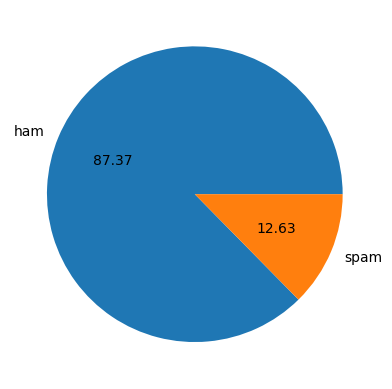

In [104]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [105]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [106]:
import nltk

In [107]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

## No. of characters

In [108]:
df['num_characters'] = df['text'].apply(len)

In [109]:
df.head()
print(nltk.data.path)


['C:\\Users\\ayush/nltk_data', 'c:\\Users\\ayush\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data', 'c:\\Users\\ayush\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data', 'c:\\Users\\ayush\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data', 'C:\\Users\\ayush\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', 'C:\\Users\\ayush\\nltk_data', 'C:\\Users\\ayush\\nltk_data']


## No. of Words

In [110]:
#df['num_words'] = df['text'].apply(nltk.word_tokenize)
# df['text'] = df['text'].astype(str)
from nltk.tokenize import word_tokenize
df['num_words'] = df['text'].apply(lambda x: len(word_tokenize(x)))
# df['num_words'] = df['text'].apply(lambda x: len(x.split()))


In [111]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


## No. of Sentences

In [112]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [113]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [114]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [115]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [116]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


## NOTE: 
The Description tells us ham and spam message on average,spam tend to be slightly larger in size than ham 

In [118]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

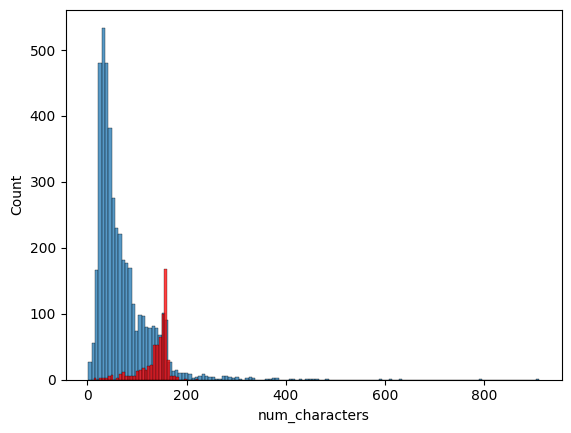

In [119]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

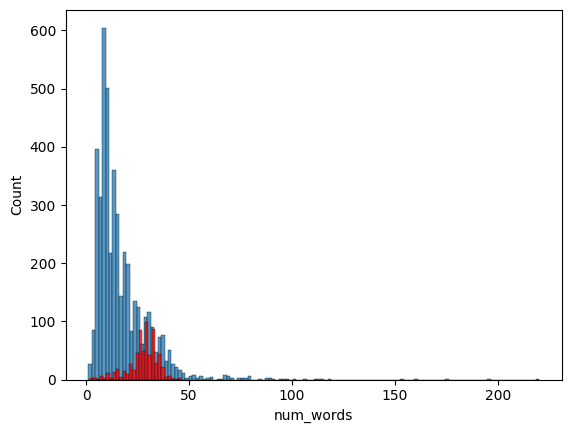

In [120]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

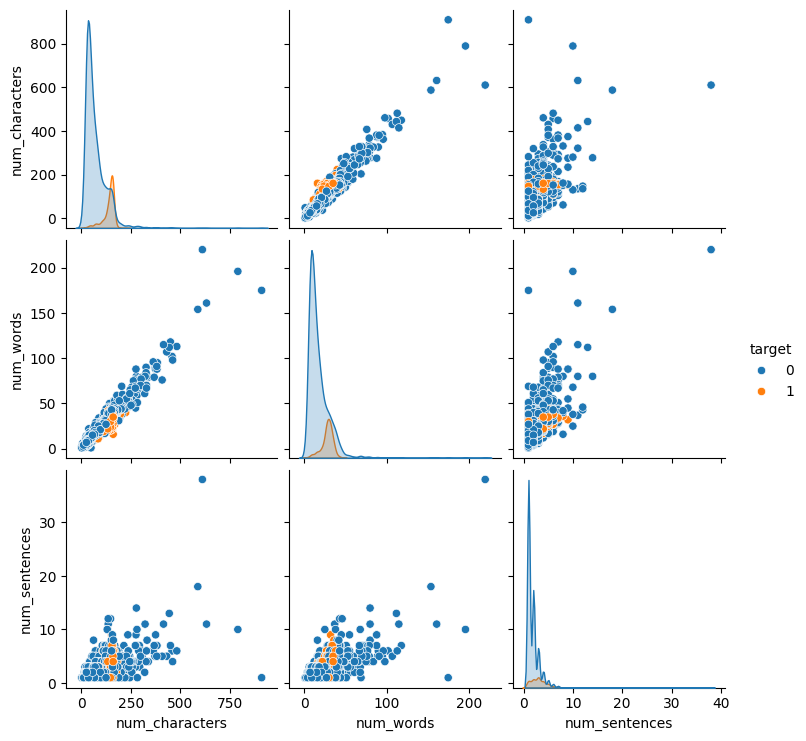

In [121]:
sns.pairplot(df,hue='target')

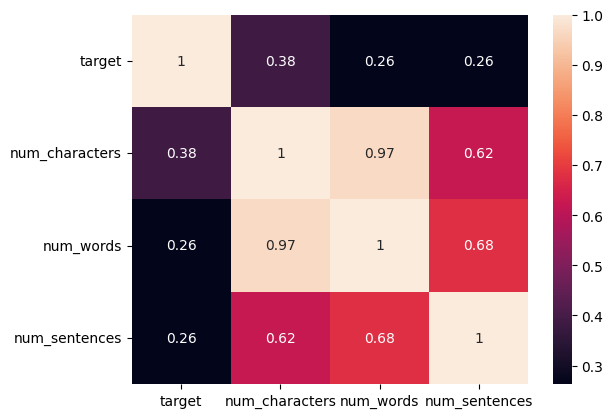

In [122]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)#annot adds the numerical value to map
plt.show()

# Data Preprocessing
## Lower case
## tokenization
## remove special chars
## remove stopwords and punctuation
## stemming

In [123]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transform_text(text):
    text = text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [124]:
df['transform_text'] = df['text'].apply(transform_text)

In [125]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [127]:
%pip install wordcloud

# Word Cloud
> To find top words used

In [128]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [129]:
spam_wc=wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=" "))

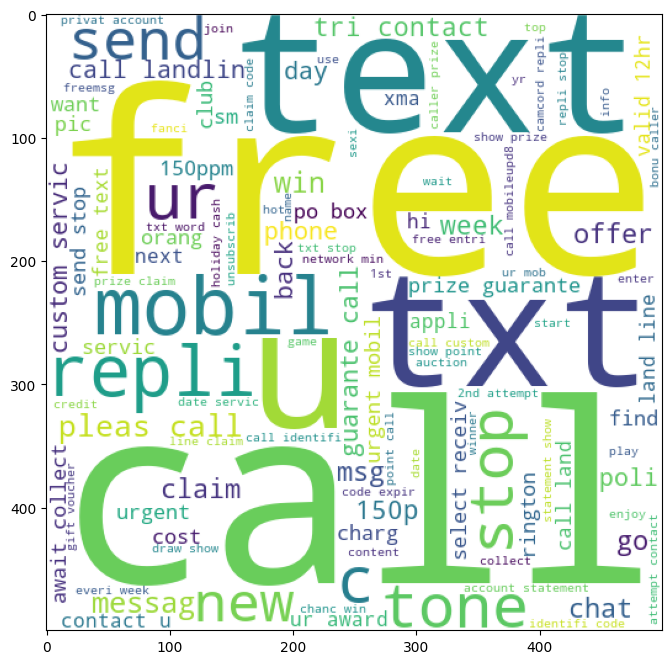

In [130]:
plt.figure(figsize=(16,8))
plt.imshow(spam_wc)

In [131]:
ham_wc=wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep=" "))

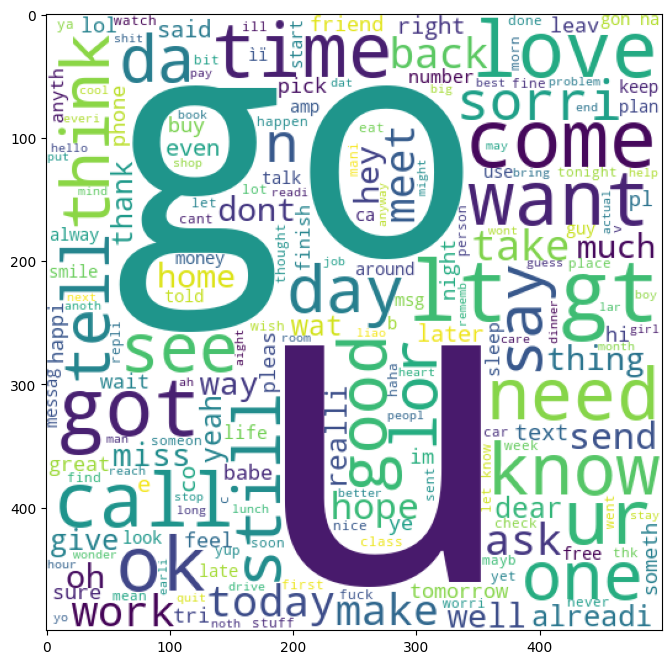

In [132]:
plt.figure(figsize=(16,8))
plt.imshow(ham_wc)

In [133]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [134]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [135]:
len(spam_corpus)

9939

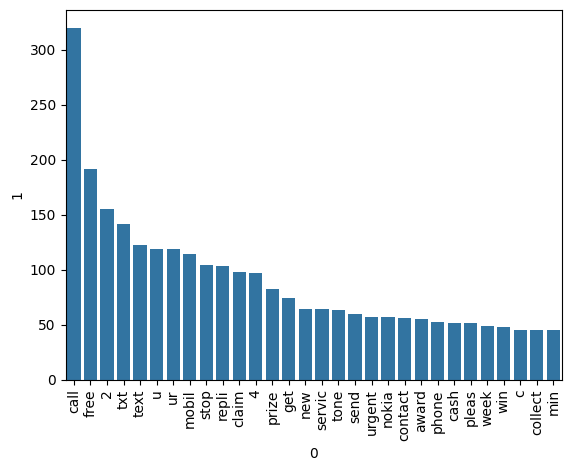

In [136]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [137]:
ham_corpus=[]
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [138]:
len(ham_corpus)

35404

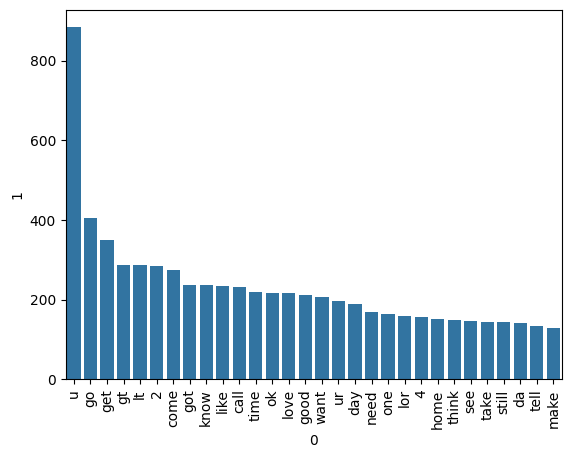

In [139]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

### Naive bayes
> For an SMS Classifier,NB is suitable choice due to nature of textual data and the simplicity of algorithm
> For building ML model the input should be numerical or vector ,but here transformed_text is in string so we have to deal with it using bag of words.
### Count Vectorizer
> The bag of words model simplifies text into numbers by counting how often words appear,making it easier for computer to analyze and process text data tasks like classification

In [140]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
X=cv.fit_transform(df['transform_text']).toarray()

print ("SMS: ",X.shape[0])
print ("Total words: : ",X.shape[1])
print(X)

SMS:  5169
Total words: :  6708
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [141]:
Y=df['target'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

### Now we apply train-test split()

In [142]:
from sklearn.model_selection import train_test_split

## Why we use these models?
>NaiveBayes classifers, such as MultinomialNB and BernoulliNB are commonly used for SMS classifier projects they are efficient,easy to implement,effective for text classification,handle sparse data wellscale to large datasets and achieve good performance.

## Differences
- GaussianNB works with data that looks like a curve means it is typically used for features that are continuous or real-valued.
- MultinomialNB works with counting occurences like words in text.
- BernoulliNB works with situations where you are just interested in whether something happens or not.

### Precision Scores
-It tells us how much the model is accurate in catching spam while avoiding mistakes that could upset users or miss business goals.

In [143]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2) #20% data used
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [144]:
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1)) # accuracy is 88%
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1)) # precision 53%

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


> Decision: Since precison is very low which suggest that it struggles to accurately identify spam. So we drop it.

In [145]:
mnb.fit(X_train,Y_train)
Y_pred1 = mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1)) # accuracy is 96%
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1)) # precision 83%

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


> Low Precision So We drop this also

In [146]:
bnb.fit(X_train,Y_train)
Y_pred1 = bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1)) # accuracy is 97%
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1)) # precision 97%

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


> Decision: Bernoulli is overall better than other two in terms of performance.

## TFIDF Vectorizer
> TfidfVectorizer is a tool in natural language processing that transform text data into numbers for machine learning. It assigns scores to words based on their importance in each document and across the entire dataset. This helps algorithms understand the context and significance of words. It makes data understandable for ML algorithms by giving numerical importance to words.

In [147]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

X1=tfidf.fit_transform(df['transform_text']).toarray()

print(X1.shape)

(5169, 3000)


In [148]:
Y1=df['target'].values
Y1

array([0, 0, 1, ..., 0, 0, 0])

### Now we apply train-test split

In [151]:
X_train,X_test,Y_train,Y_test=train_test_split(X1,Y1,test_size=0.2,random_state=2) #20% data used
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [152]:
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1)) # accuracy is 86%
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1)) # precision 50%

0.8733075435203095
[[790 106]
 [ 25 113]]
0.5159817351598174


> Decision: Since precison is very low which suggest that it struggles to accurately identify spam. So we drop it.

In [153]:
mnb.fit(X_train,Y_train)
Y_pred1 = mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1)) # accuracy is 97%
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1)) # precision 100%

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


> Decision: This models on the basis of scores tells us that it doesnot give any False positive and it is suitable also.

In [154]:
bnb.fit(X_train,Y_train)
Y_pred1 = bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1)) # accuracy is 98%
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1)) # precision 99%

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


> Decision: Since its scores are less than MultinomialNB So, we drop this.

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [156]:
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)

In [164]:
#Dictionary Creationd
clfs={
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
}

In [165]:
def train_classifier(classifier,X_train,Y_train,X_test,Y_test):
    classifier.fit(X_train,Y_train)
    Y_pred=classifier.predict(X_test)
    accuracy=accuracy_score(Y_test,Y_pred)
    precision=precision_score(Y_test,Y_pred)
    return accuracy,precision

In [166]:
train_classifier(lrc,X_train,Y_train,X_test,Y_test)

(0.9564796905222437, np.float64(0.9696969696969697))

In [167]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,Y_train,X_test,Y_test)
    
    print("for ",name)
    print("Accuracy: ",current_accuracy)
    print("Precision: ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for  DT
Accuracy:  0.9294003868471954
Precision:  0.8282828282828283
for  LR
Accuracy:  0.9564796905222437
Precision:  0.9696969696969697
for  RF
Accuracy:  0.97678916827853
Precision:  0.975


c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


for  AdaBoost
Accuracy:  0.9690522243713733
Precision:  0.9732142857142857


In [168]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
2,RF,0.976789,0.975000
3,AdaBoost,0.969052,0.973214
1,LR,0.956480,0.969697
0,DT,0.929400,0.828283


In [169]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.976789
1,AdaBoost,Accuracy,0.969052
2,LR,Accuracy,0.956480
3,DT,Accuracy,0.929400
4,RF,Precision,0.975000
5,AdaBoost,Precision,0.973214
6,LR,Precision,0.969697
7,DT,Precision,0.828283


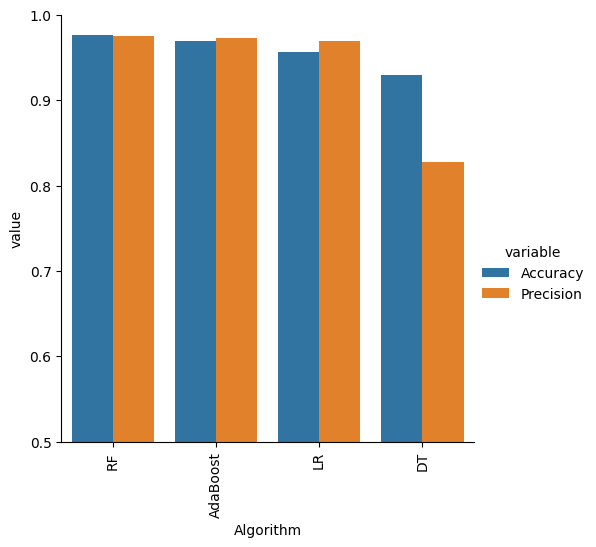

In [170]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Final Decision
<b> By examining and comparing the performances of different algorithms I can say that only the MultinomialNB with TfidfVectorizer have precision of 100% and accuracy of 97% which is best for SMS-Classifier Project.

## Pickle
- Pickle in python is primarily used in serializing and deserializing a Python Object structure. In other wrds, it is the process of converting a Python object into a byte stream(0,1) to store it in a file/database,maintain program state across session, or transport data over the network.
<br><br>Serializing : Converting a Python object into byte stream.(Pickle)

In [171]:
import pickle
# serialize and save the tfidf object to file named vectorizer
#wb mode is used for writing in binary
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
# serialize and save the mnb object to file named vectorizer
#wb mode is used for writing in binary
pickle.dump(mnb,open('model.pkl','wb'))